In [75]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logging

local_data_path = "data"

In [76]:
# Function to merge all CSV files in the data folder
def merge_csv_files(data_path):
    """
    Merge all CSV files in the specified data folder into a single DataFrame
    """
    # Get list of all CSV files in the data folder
    csv_files = [f for f in os.listdir(data_path) if f.endswith('.csv')]
    
    if not csv_files:
        print("No CSV files found in the data folder!")
        return None
    
    print(f"Found {len(csv_files)} CSV files:")
    for file in csv_files:
        print(f"  - {file}")
    
    # List to store individual DataFrames
    dataframes = []
    
    # Read each CSV file and add to the list
    for csv_file in csv_files:
        file_path = os.path.join(data_path, csv_file)
        try:
            df = pd.read_csv(file_path)
            # Add a column to identify the source file
            df['source_file'] = csv_file
            dataframes.append(df)
            print(f"✓ Successfully loaded {csv_file} with {len(df)} rows")
        except Exception as e:
            print(f"✗ Error loading {csv_file}: {e}")
    
    if not dataframes:
        print("No CSV files could be loaded!")
        return None
    
    # Concatenate all DataFrames
    merged_df = pd.concat(dataframes, ignore_index=True)
    
    print(f"\n📊 Merged DataFrame Summary:")
    print(f"   Total rows: {len(merged_df)}")
    print(f"   Total columns: {len(merged_df.columns)}")
    print(f"   Column names: {list(merged_df.columns)}")
    
    return merged_df

# Merge all CSV files
merged_data = merge_csv_files(local_data_path)

Found 25 CSV files:
  - pcl_curve_seed0_attr0p5_spur0p1.csv
  - pcl_curve_seed0_attr0p5_spur0p01.csv
  - pcl_curve_seed0_attr0p5_spur0p2.csv
  - pcl_curve_seed0_attr0p5_spur0p5.csv
  - pcl_curve_seed0_attr0p5_spur0p05.csv
  - pcl_curve_seed1_attr0p5_spur0p1.csv
  - pcl_curve_seed1_attr0p5_spur0p01.csv
  - pcl_curve_seed1_attr0p5_spur0p2.csv
  - pcl_curve_seed1_attr0p5_spur0p5.csv
  - pcl_curve_seed1_attr0p5_spur0p05.csv
  - pcl_curve_seed2_attr0p5_spur0p1.csv
  - pcl_curve_seed2_attr0p5_spur0p01.csv
  - pcl_curve_seed2_attr0p5_spur0p2.csv
  - pcl_curve_seed2_attr0p5_spur0p5.csv
  - pcl_curve_seed2_attr0p5_spur0p05.csv
  - pcl_curve_seed3_attr0p5_spur0p1.csv
  - pcl_curve_seed3_attr0p5_spur0p01.csv
  - pcl_curve_seed3_attr0p5_spur0p2.csv
  - pcl_curve_seed3_attr0p5_spur0p5.csv
  - pcl_curve_seed3_attr0p5_spur0p05.csv
  - pcl_curve_seed4_attr0p5_spur0p1.csv
  - pcl_curve_seed4_attr0p5_spur0p01.csv
  - pcl_curve_seed4_attr0p5_spur0p2.csv
  - pcl_curve_seed4_attr0p5_spur0p5.csv
  - pcl_cur

In [77]:
# Display the merged DataFrame
if merged_data is not None:
    print("🔍 First few rows of the merged data:")
    print(merged_data.head(10))
    
    print("\n📈 Data types:")
    print(merged_data.dtypes)
    
    print("\n📊 Basic statistics:")
    print(merged_data.describe())
    
    print("\n🔢 Value counts for categorical columns:")
    categorical_cols = ['algorithm', 'source_file']
    for col in categorical_cols:
        if col in merged_data.columns:
            print(f"\n{col}:")
            print(merged_data[col].value_counts())
    
    print("\n✨ Unique parameter combinations:")
    if all(col in merged_data.columns for col in ['cmnist_attr_prob', 'cmnist_spur_prob']):
        unique_params = merged_data[['cmnist_attr_prob', 'cmnist_spur_prob']].drop_duplicates()
        print(unique_params)
else:
    print("❌ No data to display - check the data folder path and CSV files.")

🔍 First few rows of the merged data:
  algorithm  dataset_size  val_loss  train_loss  test_loss  test_acc  \
0  GroupDRO            10  0.356916    0.063876   1.205211   0.50655   
1  GroupDRO            37  0.350314    0.189025   1.126390   0.50015   
2  GroupDRO           144  0.289645    0.199194   0.947335   0.61910   
3  GroupDRO           547  0.274875    0.242868   0.831043   0.67975   
4  GroupDRO          2080  0.210078    0.270259   0.467450   0.82115   
5  GroupDRO          7899  0.106867    0.163321   0.260694   0.90825   
6  GroupDRO         30000  0.070318    0.130645   0.148808   0.94980   
7       ERM            10  0.371807    0.110972   1.278292   0.51165   
8       ERM            37  0.333081    0.232008   1.153709   0.50045   
9       ERM           144  0.294931    0.215872   1.103155   0.52850   

   worst_group_acc  seed  cmnist_attr_prob  cmnist_spur_prob  \
0         0.000000     0               0.5               0.1   
1         0.007964     0               0.5

In [78]:
# Helper functions for data analysis
def get_data_by_algorithm(df, algorithm_name):
    """Get data for a specific algorithm"""
    return df[df['algorithm'] == algorithm_name].copy()

def get_data_by_params(df, attr_prob, spur_prob):
    """Get data for specific parameter combination"""
    return df[(df['cmnist_attr_prob'] == attr_prob) & 
              (df['cmnist_spur_prob'] == spur_prob)].copy()

def compare_algorithms_at_dataset_size(df, dataset_size, metrics=['test_acc', 'worst_group_acc']):
    """Compare all algorithms at a specific training size"""
    subset = df[df['dataset_size'] == dataset_size]
    comparison = subset.pivot_table(
        index=['cmnist_attr_prob', 'cmnist_spur_prob'], 
        columns='algorithm', 
        values=metrics,
        aggfunc='first'
    )
    return comparison

# Example usage:
if merged_data is not None:
    print("🔍 Available algorithms:", merged_data['algorithm'].unique())
    print("🎯 Available train sizes:", sorted(merged_data['dataset_size'].unique()))
    
    # Example: Compare algorithms at dataset_size = 1219
    if 1219 in merged_data['dataset_size'].values:
        print("\n📊 Comparison at dataset_size = 1219:")
        comparison = compare_algorithms_at_dataset_size(merged_data, 1219)
        print(comparison)

🔍 Available algorithms: ['GroupDRO' 'ERM']
🎯 Available train sizes: [10, 37, 144, 547, 2080, 7899, 30000]


In [79]:
merged_data

,algorithm,dataset_size,val_loss,train_loss,test_loss,test_acc,worst_group_acc,seed,cmnist_attr_prob,cmnist_spur_prob,"group_y=0,a=0_acc","group_y=0,a=1_acc","group_y=1,a=0_acc","group_y=1,a=1_acc",source_file
0,GroupDRO,10,0.356916,0.063876,1.205211,0.50655,0.000000,0,0.5,0.10,1.000000,0.060023,0.000000,0.962457,pcl_curve_seed0_attr0p5_spur0p1.csv
1,GroupDRO,37,0.350314,0.189025,1.126390,0.50015,0.007964,0,0.5,0.10,0.975736,0.007964,0.019616,0.995985,pcl_curve_seed0_attr0p5_spur0p1.csv
2,GroupDRO,144,0.289645,0.199194,0.947335,0.61910,0.142474,0,0.5,0.10,0.979714,0.384227,0.142474,0.961253,pcl_curve_seed0_attr0p5_spur0p1.csv
3,GroupDRO,547,0.274875,0.242868,0.831043,0.67975,0.358662,0,0.5,0.10,0.954455,0.454545,0.358662,0.947400,pcl_curve_seed0_attr0p5_spur0p1.csv
4,GroupDRO,2080,0.210078,0.270259,0.467450,0.82115,0.682012,0,0.5,0.10,0.952665,0.682012,0.690688,0.959044,pcl_curve_seed0_attr0p5_spur0p1.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,ERM,144,0.196032,0.145710,1.749341,0.50340,0.000583,4,0.5,0.05,1.000000,0.000583,0.011563,1.000000,pcl_curve_seed4_attr0p5_spur0p05.csv
290,ERM,547,0.177602,0.157169,1.435735,0.50960,0.014041,4,0.5,0.05,0.999801,0.023699,0.014041,0.998795,pcl_curve_seed4_attr0p5_spur0p05.csv
291,ERM,2080,0.134188,0.129747,1.001715,0.61860,0.147842,4,0.5,0.05,0.996818,0.327506,0.147842,0.995382,pcl_curve_seed4_attr0p5_spur0p05.csv
292,ERM,7899,0.077612,0.079244,0.631135,0.77640,0.525501,4,0.5,0.05,0.993835,0.589355,0.525501,0.994178,pcl_curve_seed4_attr0p5_spur0p05.csv


🔍 VALIDATION CURVES
🔍 Found 2 algorithms: ['ERM', 'GroupDRO']


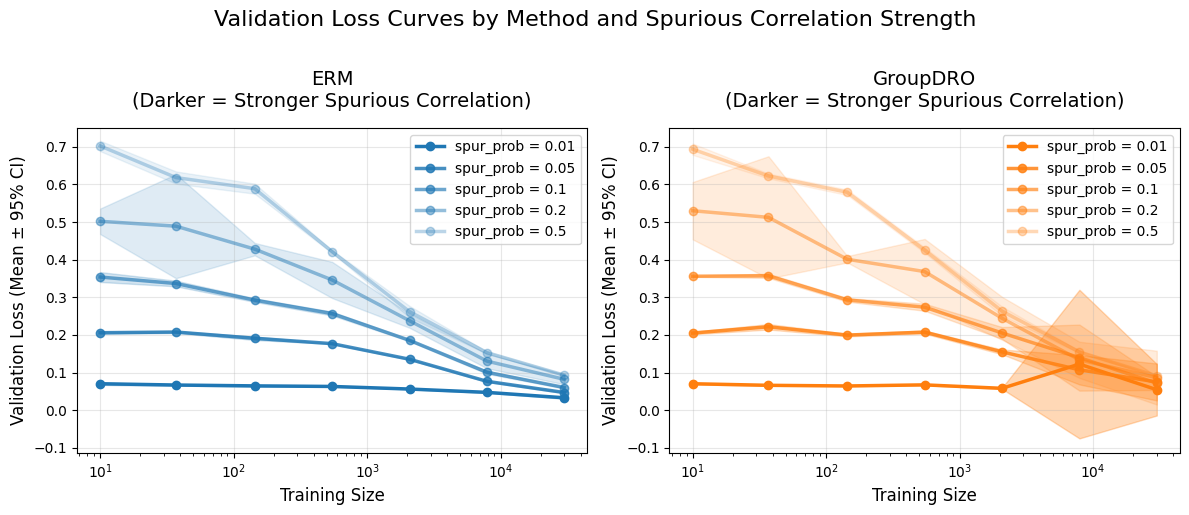



🎯 TEST CURVES
🔍 Found 2 algorithms: ['ERM', 'GroupDRO']


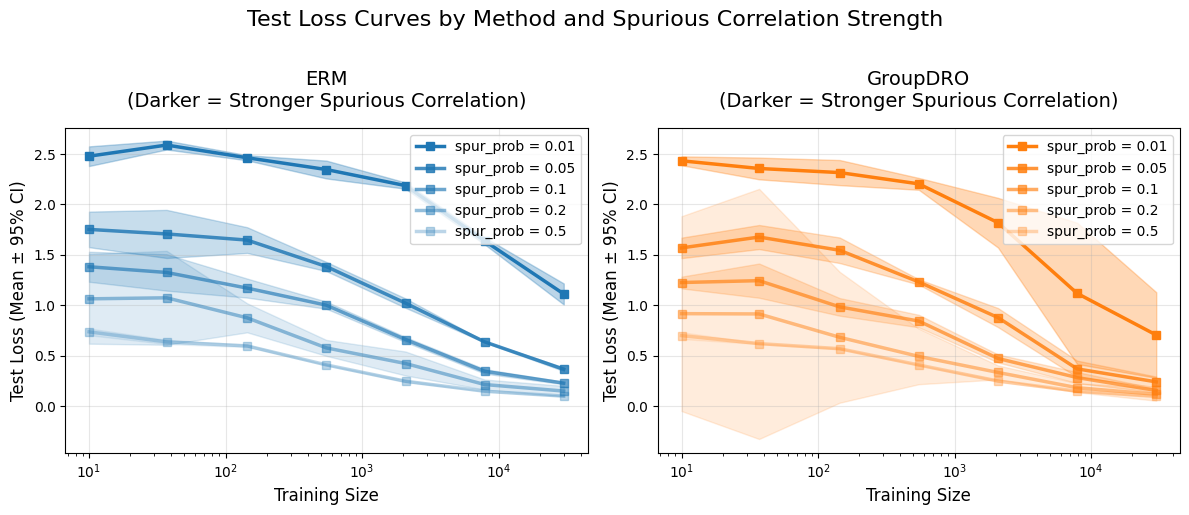



🔍 TEST ACCURACY CURVES
🔍 Found 2 algorithms: ['ERM', 'GroupDRO']


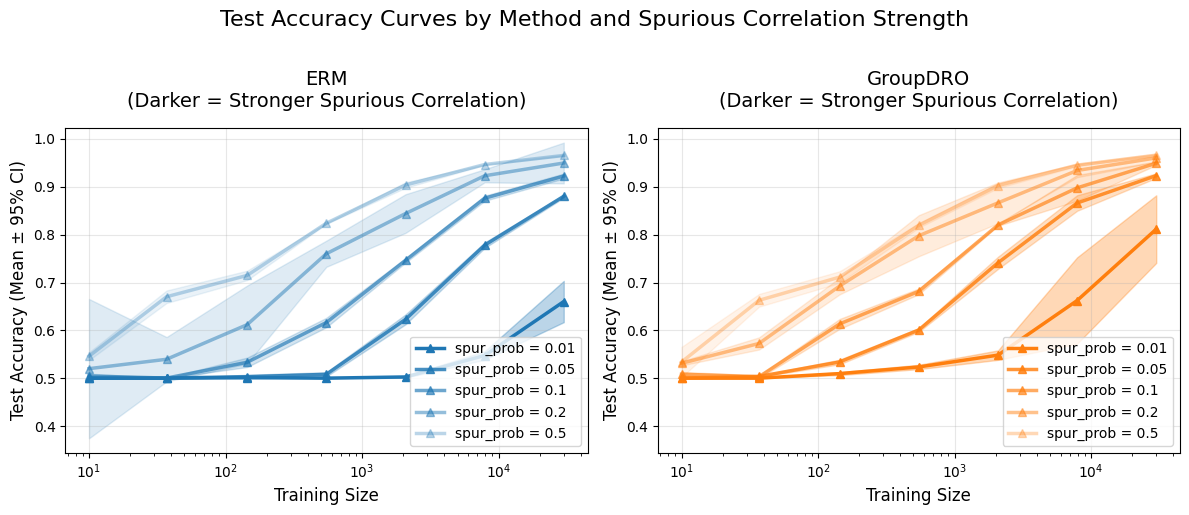



🎯 WORST GROUP ACCURACY CURVES
🔍 Found 2 algorithms: ['ERM', 'GroupDRO']


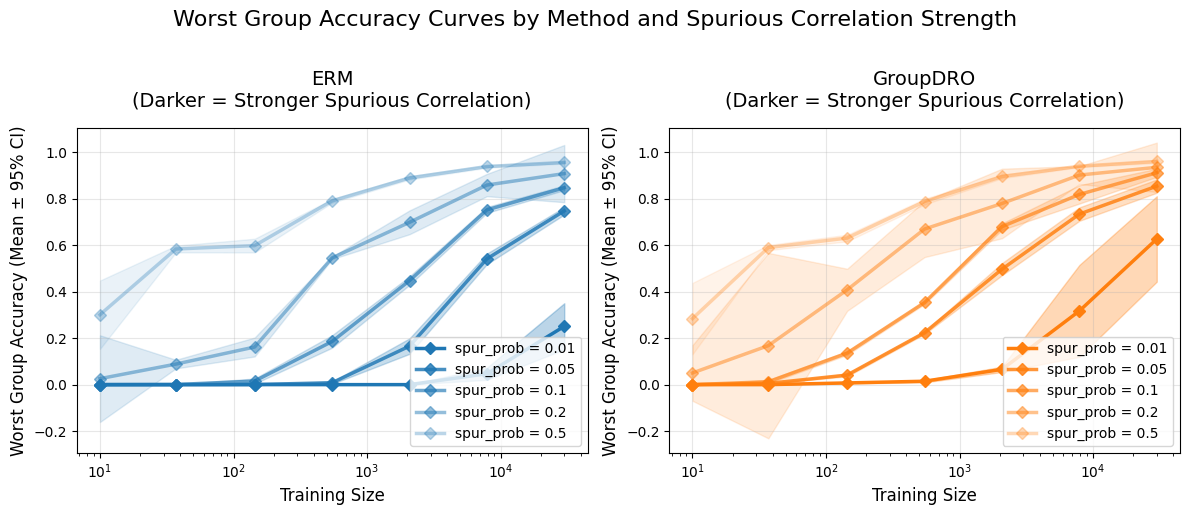

In [80]:
# Unified function for plotting validation or test curves with fading contrast by spurious probability
import matplotlib.colors as mcolors
import scipy.stats as stats

def create_learning_curve_plots_separate(df, loss_type='val_loss', curve_name='Validation', y_log_scale=False):
    """
    Create separate plots showing learning curves for each method
    with fading contrast based on cmnist_spur_prob values
    Shows mean ± confidence interval across seeds
    
    Parameters:
    - df: DataFrame with the data
    - loss_type: Column name for the metric to plot ('val_loss', 'test_loss', 'test_acc', 'worst_group_acc')
    - curve_name: Name for plot titles and labels
    - y_log_scale: Whether to use log scale for y-axis (False by default for linear scale)
    """
    # Dynamically get available algorithms from the data
    available_algorithms = sorted(df['algorithm'].unique())
    n_algorithms = len(available_algorithms)
    
    if n_algorithms == 0:
        print("❌ No algorithms found in the data!")
        return
    
    print(f"🔍 Found {n_algorithms} algorithms: {available_algorithms}")
    
    # Set up the figure with dynamic number of subplots
    fig, axes = plt.subplots(1, n_algorithms, figsize=(6 * n_algorithms, 5))
    
    # Handle case where there's only one algorithm (axes won't be a list)
    if n_algorithms == 1:
        axes = [axes]
    
    # Create a dynamic color palette using matplotlib's color cycle
    # This ensures good contrast and visibility for any number of algorithms
    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']
    
    # If we have more algorithms than default colors, generate more colors
    if n_algorithms > len(colors):
        # Use a colormap to generate additional distinct colors
        cmap = plt.cm.Set1  # or plt.cm.tab10, plt.cm.Dark2, etc.
        additional_colors = [cmap(i / n_algorithms) for i in range(len(colors), n_algorithms)]
        colors.extend([mcolors.to_hex(c) for c in additional_colors])
    
    # Create algorithm color mapping
    algorithm_colors = {alg: colors[i % len(colors)] for i, alg in enumerate(available_algorithms)}
    
    # Define markers for different metric types
    markers = {
        'val_loss': 'o', 
        'test_loss': 's', 
        'test_acc': '^', 
        'worst_group_acc': 'D'
    }
    marker = markers.get(loss_type, 'o')
    
    # Get unique spurious probabilities and sort them
    spur_probs = sorted(df['cmnist_spur_prob'].unique())
    
    # Calculate alpha values (transparency) - more transparent for higher spur_prob
    # Lower spur_prob = more opaque, higher spur_prob = more transparent
    min_alpha, max_alpha = 0.3, 1.0
    alphas = {}
    for i, spur_prob in enumerate(spur_probs):
        # Reverse the order so that lower spur_prob gets higher alpha (more opaque)
        alpha = max_alpha - (i / (len(spur_probs) - 1)) * (max_alpha - min_alpha) if len(spur_probs) > 1 else max_alpha
        alphas[spur_prob] = alpha
    
    # Create a subplot for each algorithm
    for idx, algorithm in enumerate(available_algorithms):
        ax = axes[idx]
        
        algorithm_data = df[df['algorithm'] == algorithm]
        color = algorithm_colors[algorithm]
        
        for spur_prob in spur_probs:
            # Filter data for this algorithm and spurious probability
            subset = algorithm_data[algorithm_data['cmnist_spur_prob'] == spur_prob]
            
            if len(subset) > 0:
                # Group by dataset_size and calculate statistics across seeds
                grouped = subset.groupby('dataset_size')[loss_type].agg(['mean', 'std', 'count']).reset_index()
                
                # Calculate 95% confidence interval
                confidence_level = 0.95
                grouped['ci'] = grouped.apply(
                    lambda row: stats.t.ppf((1 + confidence_level) / 2, row['count'] - 1) * row['std'] / np.sqrt(row['count']) 
                    if row['count'] > 1 and pd.notna(row['std']) else 0, axis=1
                )
                
                # Sort by dataset_size for proper line plotting
                grouped = grouped.sort_values('dataset_size')
                
                # Create label for each spurious probability
                label = f'spur_prob = {spur_prob}'
                alpha = alphas[spur_prob]
                
                # Plot mean line
                ax.plot(grouped['dataset_size'], grouped['mean'], 
                       color=color, alpha=alpha, linewidth=2.5,
                       marker=marker, markersize=6, label=label)
                
                # Add confidence interval as shaded area
                if len(grouped) > 0:
                    ax.fill_between(grouped['dataset_size'], 
                                   grouped['mean'] - grouped['ci'],
                                   grouped['mean'] + grouped['ci'],
                                   color=color, alpha=alpha*0.3)
        
        # Customize each subplot
        ax.set_xlabel('Training Size', fontsize=12)
        
        # Set y-axis label based on metric type
        if 'loss' in loss_type.lower():
            ax.set_ylabel(f'{curve_name} Loss (Mean ± 95% CI)', fontsize=12)
        else:
            ax.set_ylabel(f'{curve_name} (Mean ± 95% CI)', fontsize=12)
            
        ax.set_title(f'{algorithm}\n(Darker = Stronger Spurious Correlation)', 
                    fontsize=14, pad=15)
        ax.set_xscale('log')
        
        # Apply log scale to y-axis only if specified
        if y_log_scale:
            ax.set_yscale('log')
            
        ax.grid(True, alpha=0.3)
        
        # Set legend position based on metric type
        if 'acc' in loss_type.lower():  # For accuracy metrics
            ax.legend(fontsize=10, loc='lower right')
        else:  # For loss metrics
            ax.legend(fontsize=10, loc='upper right')
        
        # Set consistent y-axis limits across all subplots for better comparison
        if idx == 0:
            y_min, y_max = ax.get_ylim()
        else:
            current_y_min, current_y_max = ax.get_ylim()
            y_min = min(y_min, current_y_min)
            y_max = max(y_max, current_y_max)
    
    # Apply consistent y-axis limits to all subplots
    for ax in axes:
        ax.set_ylim(y_min, y_max)
    
    # Add overall title
    if 'loss' in loss_type.lower():
        fig.suptitle(f'{curve_name} Loss Curves by Method and Spurious Correlation Strength', 
                    fontsize=16, y=1.02)
    else:
        fig.suptitle(f'{curve_name} Curves by Method and Spurious Correlation Strength', 
                    fontsize=16, y=1.02)
    
    plt.tight_layout()
    plt.show()
    

# Create validation curves
print("🔍 VALIDATION CURVES")
print("=" * 50)
if merged_data is not None:
    create_learning_curve_plots_separate(merged_data, loss_type='val_loss', curve_name='Validation', y_log_scale=False)
else:
    print("❌ No merged data available for plotting.")

print("\n\n🎯 TEST CURVES") 
print("=" * 50)
# Create test curves
if merged_data is not None:
    create_learning_curve_plots_separate(merged_data, loss_type='test_loss', curve_name='Test', y_log_scale=False)
else:
    print("❌ No merged data available for plotting.")
    
# Create test accuracy curves
print("\n\n🔍 TEST ACCURACY CURVES")
print("=" * 50)
if merged_data is not None:
    create_learning_curve_plots_separate(merged_data, loss_type='test_acc', curve_name='Test Accuracy', y_log_scale=False)
else:
    print("❌ No merged data available for plotting.")

print("\n\n🎯 WORST GROUP ACCURACY CURVES")
print("=" * 50)
# Create worst group accuracy curves
if merged_data is not None:
    create_learning_curve_plots_separate(merged_data, loss_type='worst_group_acc', curve_name='Worst Group Accuracy', y_log_scale=False)
else:
    print("❌ No merged data available for plotting.")

🎯 GROUP-SPECIFIC ACCURACY DIFFERENCES (ERM - GroupDRO)
🔍 Found 4 group accuracy columns: ['group_y=0,a=0_acc', 'group_y=1,a=0_acc', 'group_y=0,a=1_acc', 'group_y=1,a=1_acc']
✓ Found both ERM and GroupDRO algorithms
📊 Global difference range: [-0.3804, 0.1740]


/tmp/ipykernel_741850/2810758579.py:169: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_741850/2810758579.py:169: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from current font.
  plt.tight_layout()
/home/mila/t/tom.marty/invariant_bench/XRM/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/mila/t/tom.marty/invariant_bench/XRM/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/mila/t/tom.marty/invariant_bench/XRM/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/mila/t/tom.marty/invariant_b

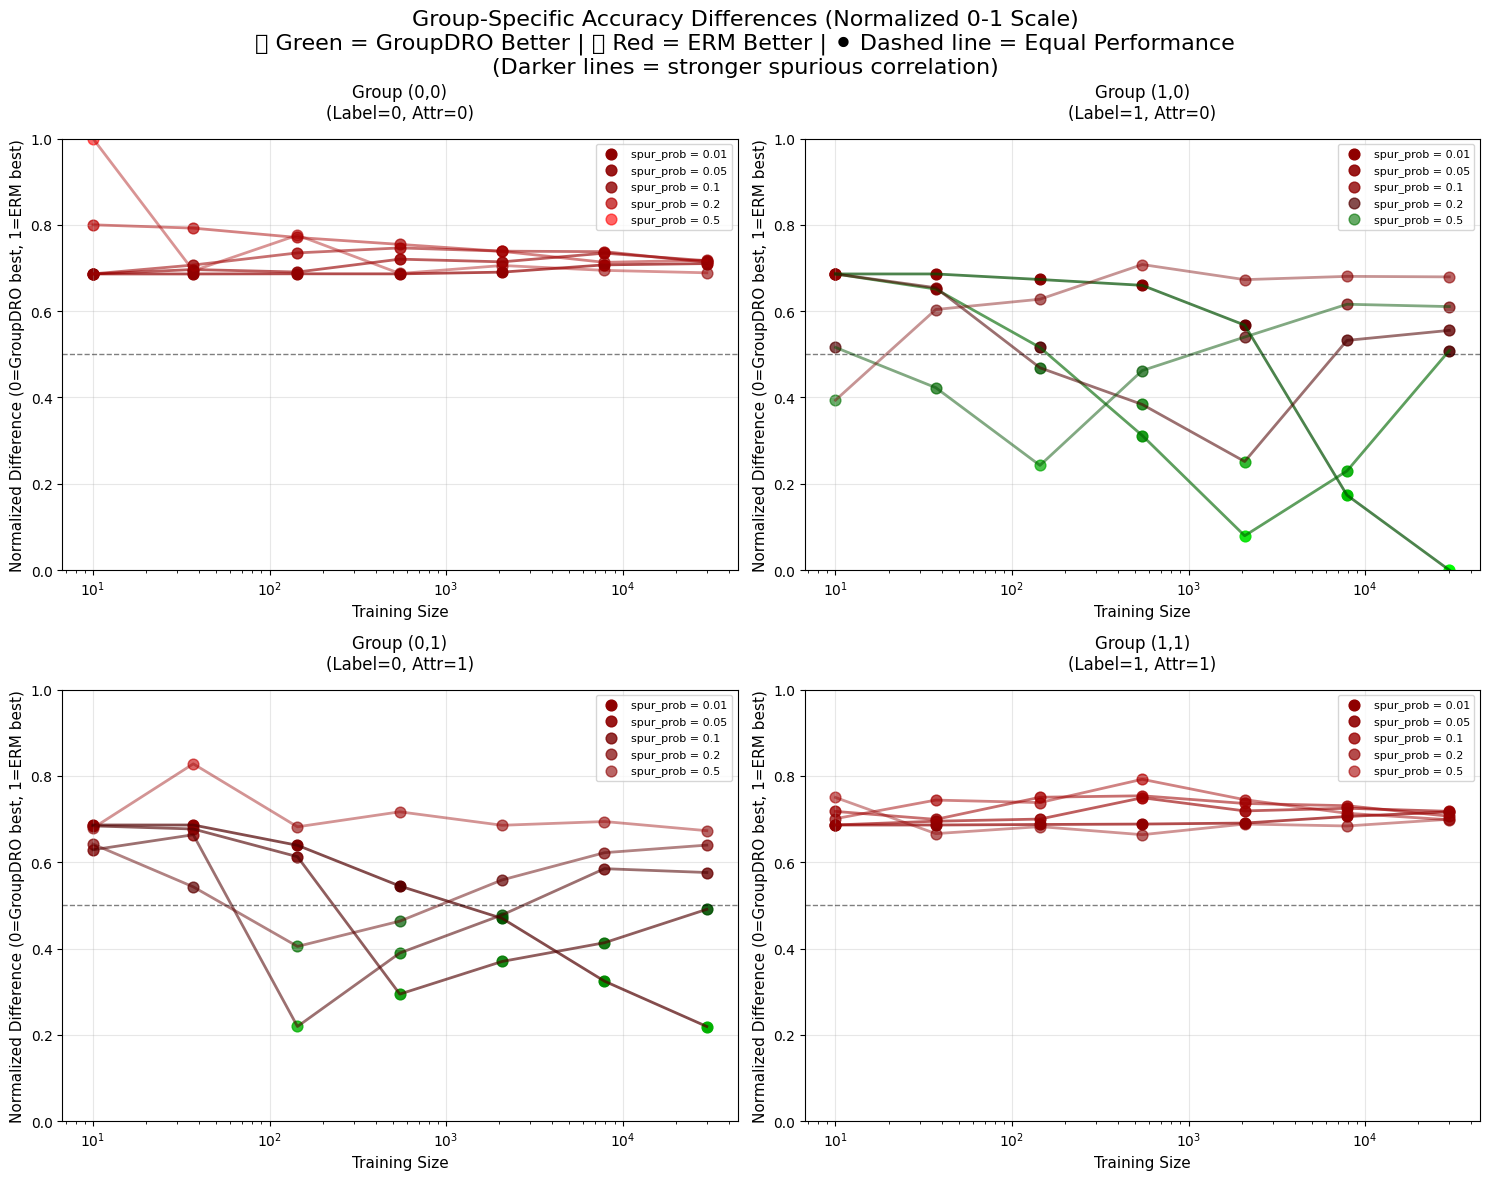

In [ ]:
def create_group_accuracy_difference_plots(df):
    """
    Create 2x2 subplot grid showing normalized accuracy difference (ERM - GroupDRO) for each group: (0,0), (1,0), (0,1), (1,1)
    Each subplot shows learning curves with red-green color scheme:
    - Red: ERM performs better
    - Green: GroupDRO performs better
    Values are normalized between 0 and 1
    
    Parameters:
    - df: DataFrame with the data
    """
    # Check if we have group-specific accuracy columns (using actual column names)
    group_cols = ['group_y=0,a=0_acc', 'group_y=1,a=0_acc', 'group_y=0,a=1_acc', 'group_y=1,a=1_acc']
    available_group_cols = [col for col in group_cols if col in df.columns]
    
    if not available_group_cols:
        print("❌ No group-specific accuracy columns found in the data!")
        print(f"Expected columns: {group_cols}")
        print(f"Available columns: {list(df.columns)}")
        return
    
    print(f"🔍 Found {len(available_group_cols)} group accuracy columns: {available_group_cols}")
    
    # Check if we have both ERM and GroupDRO algorithms
    available_algorithms = df['algorithm'].unique()
    if 'ERM' not in available_algorithms or 'GroupDRO' not in available_algorithms:
        print("❌ Both ERM and GroupDRO algorithms are required for difference plotting!")
        print(f"Available algorithms: {list(available_algorithms)}")
        return
    
    print("✓ Found both ERM and GroupDRO algorithms")
    
    # Get unique spurious probabilities and sort them
    spur_probs = sorted(df['cmnist_spur_prob'].unique())
    
    # Calculate alpha values (transparency) - more transparent for higher spur_prob
    min_alpha, max_alpha = 0.6, 1.0
    alphas = {}
    for i, spur_prob in enumerate(spur_probs):
        alpha = max_alpha - (i / (len(spur_probs) - 1)) * (max_alpha - min_alpha) if len(spur_probs) > 1 else max_alpha
        alphas[spur_prob] = alpha
    
    # First pass: collect all differences to find global min/max for normalization
    all_differences = []
    temp_data = {}
    
    for group_col in available_group_cols:
        temp_data[group_col] = {}
        for spur_prob in spur_probs:
            # Get ERM and GroupDRO data
            erm_data = df[(df['algorithm'] == 'ERM') & (df['cmnist_spur_prob'] == spur_prob)]
            groupdro_data = df[(df['algorithm'] == 'GroupDRO') & (df['cmnist_spur_prob'] == spur_prob)]
            
            if len(erm_data) > 0 and len(groupdro_data) > 0:
                # Group by dataset_size and calculate mean across seeds
                erm_grouped = erm_data.groupby('dataset_size')[group_col].mean().reset_index()
                erm_grouped.columns = ['dataset_size', 'erm_mean']
                
                groupdro_grouped = groupdro_data.groupby('dataset_size')[group_col].mean().reset_index()
                groupdro_grouped.columns = ['dataset_size', 'groupdro_mean']
                
                # Merge datasets
                merged = pd.merge(erm_grouped, groupdro_grouped, on='dataset_size', how='inner')
                
                if len(merged) > 0:
                    # Calculate raw difference
                    merged['difference'] = merged['erm_mean'] - merged['groupdro_mean']
                    merged = merged.sort_values('dataset_size')
                    temp_data[group_col][spur_prob] = merged
                    all_differences.extend(merged['difference'].values)
    
    # Calculate global min/max for normalization
    if not all_differences:
        print("❌ No differences could be calculated!")
        return
        
    global_min = min(all_differences)
    global_max = max(all_differences)
    print(f"📊 Global difference range: [{global_min:.4f}, {global_max:.4f}]")
    
    # Define group labels and their corresponding column names
    group_info = {
        'group_y=0,a=0_acc': ('Group (0,0)', 'Label=0, Attr=0'),
        'group_y=1,a=0_acc': ('Group (1,0)', 'Label=1, Attr=0'), 
        'group_y=0,a=1_acc': ('Group (0,1)', 'Label=0, Attr=1'),
        'group_y=1,a=1_acc': ('Group (1,1)', 'Label=1, Attr=1')
    }
    
    # Set up 2x2 subplot grid
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()
    
    # Plot each group
    for idx, group_col in enumerate(available_group_cols):
        if idx >= 4:  # We only have 4 subplots
            break
            
        ax = axes[idx]
        group_title, group_desc = group_info[group_col]
        
        # Plot each spurious probability with different alpha
        for spur_prob in spur_probs:
            # Get ERM data
            erm_data = df[(df['algorithm'] == 'ERM') & (df['cmnist_spur_prob'] == spur_prob)]
            # Get GroupDRO data  
            groupdro_data = df[(df['algorithm'] == 'GroupDRO') & (df['cmnist_spur_prob'] == spur_prob)]
            
            if len(erm_data) > 0 and len(groupdro_data) > 0:
                # Group by dataset_size and calculate mean across seeds for each algorithm
                erm_grouped = erm_data.groupby('dataset_size')[group_col].mean().reset_index()
                erm_grouped.columns = ['dataset_size', 'erm_mean']
                
                groupdro_grouped = groupdro_data.groupby('dataset_size')[group_col].mean().reset_index()
                groupdro_grouped.columns = ['dataset_size', 'groupdro_mean']
                
                # Merge the two datasets on dataset_size
                merged = pd.merge(erm_grouped, groupdro_grouped, on='dataset_size', how='inner')
                
                if len(merged) > 0:
                    # Calculate difference (ERM - GroupDRO)
                    merged['difference'] = merged['erm_mean'] - merged['groupdro_mean']
                    
                    # Sort by dataset_size for proper line plotting
                    merged = merged.sort_values('dataset_size')
                    
                    # Create label for spurious probability
                    label = f'spur_prob = {spur_prob}'
                    alpha = alphas[spur_prob]
                    
                    # Plot difference line
                    ax.plot(merged['dataset_size'], merged['difference'], 
                           color=diff_color, alpha=alpha, linewidth=2.5,
                           marker='o', markersize=5, label=label)
        
        # Add horizontal line at y=0 for reference
        ax.axhline(y=0, color='black', linestyle='--', alpha=0.5, linewidth=1)
        
        # Customize subplot
        ax.set_xlabel('Training Size', fontsize=11)
        ax.set_ylabel('Accuracy Difference (ERM - GroupDRO)', fontsize=11)
        ax.set_title(f'{group_title}\n({group_desc})', fontsize=12, pad=15)
        ax.set_xscale('log')
        ax.grid(True, alpha=0.3)
        
        # Add legend to each subplot
        ax.legend(fontsize=8, loc='upper right', ncol=1)
    
    # Hide any unused subplots
    for idx in range(len(available_group_cols), 4):
        axes[idx].set_visible(False)
    
    # Add overall title
    fig.suptitle('Group-Specific Accuracy Differences (ERM - GroupDRO) by Training Size\n(Darker lines = stronger spurious correlation, dashed line = no difference)', 
                fontsize=16, y=0.98)
    
    plt.tight_layout()
    plt.show()

# Create group accuracy difference plots
print("🎯 GROUP-SPECIFIC ACCURACY DIFFERENCES (ERM - GroupDRO)")
print("=" * 50)
if merged_data is not None:
    create_group_accuracy_difference_plots(merged_data)
else:
    print("❌ No merged data available for plotting.")

In [ ]:
# Animated learning curves showing progression across spurious correlation rates
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.pyplot as plt

def create_animated_learning_curves(df, loss_type='val_loss', curve_name='Validation', y_log_scale=False):
    """
    Create animated plots showing how learning curves change across spurious correlation rates
    All available methods displayed in a single plot with confidence intervals
    
    Parameters:
    - df: DataFrame with the data
    - loss_type: Column name for the metric to plot
    - curve_name: Name for plot titles and labels
    - y_log_scale: Whether to use log scale for y-axis (False by default for linear scale)
    """
    # Get unique spurious probabilities and sort them
    spur_probs = sorted(df['cmnist_spur_prob'].unique())
    
    # Dynamically get available algorithms from the data
    available_algorithms = sorted(df['algorithm'].unique())
    
    if len(available_algorithms) == 0:
        print("❌ No algorithms found in the data!")
        return None
    
    print(f"🔍 Creating animation for {len(available_algorithms)} algorithms: {available_algorithms}")
    
    # Create a dynamic color palette using matplotlib's color cycle
    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']
    
    # If we have more algorithms than default colors, generate more colors
    if len(available_algorithms) > len(colors):
        # Use a colormap to generate additional distinct colors
        cmap = plt.cm.Set1  # or plt.cm.tab10, plt.cm.Dark2, etc.
        additional_colors = [cmap(i / len(available_algorithms)) for i in range(len(colors), len(available_algorithms))]
        colors.extend([mcolors.to_hex(c) for c in additional_colors])
    
    # Create algorithm color mapping
    algorithm_colors = {alg: colors[i % len(colors)] for i, alg in enumerate(available_algorithms)}
    
    # Define markers for different metric types
    markers = {
        'val_loss': 'o', 
        'test_loss': 's', 
        'test_acc': '^', 
        'worst_group_acc': 'D'
    }
    marker = markers.get(loss_type, 'o')
    
    # Set up the figure with a single plot - smaller size and don't show
    plt.ioff()  # Turn off interactive mode to prevent showing static plots
    fig, ax = plt.subplots(1, 1, figsize=(10, 7))  # Slightly larger for better visibility
    
    # Initialize empty plots for each algorithm (mean lines and confidence intervals)
    lines = {}
    fills = {}
    for algorithm in available_algorithms:
        lines[algorithm] = ax.plot([], [], color=algorithm_colors[algorithm], 
                                marker=marker, markersize=6, linewidth=2.5, 
                                label=f'{algorithm}')[0]
        fills[algorithm] = None  # Will store fill_between objects
    
    # Set up axes
    ax.set_xlabel('Training Size', fontsize=12)
    if 'loss' in loss_type.lower():
        ax.set_ylabel(f'{curve_name} Loss (Mean ± 95% CI)', fontsize=12)
    else:
        ax.set_ylabel(f'{curve_name} (Mean ± 95% CI)', fontsize=12)
    
    ax.set_xscale('log')
    if y_log_scale:
        ax.set_yscale('log')
    ax.grid(True, alpha=0.3)
    
    # Set legend position based on metric type
    if 'acc' in loss_type.lower():  # For accuracy metrics
        ax.legend(loc='lower right', fontsize=10)
    else:  # For loss metrics
        ax.legend(loc='upper right', fontsize=10)
    
    # Calculate global limits for consistent scaling
    # Group by algorithm, dataset_size, and spur_prob to get statistics
    grouped_stats = df.groupby(['algorithm', 'dataset_size', 'cmnist_spur_prob'])[loss_type].agg(['mean', 'std', 'count']).reset_index()
    grouped_stats['ci'] = grouped_stats.apply(
        lambda row: stats.t.ppf(0.975, row['count'] - 1) * row['std'] / np.sqrt(row['count']) 
        if row['count'] > 1 and pd.notna(row['std']) else 0, axis=1
    )
    
    all_dataset_sizes = grouped_stats['dataset_size'].values
    all_means = grouped_stats['mean'].values
    all_cis = grouped_stats['ci'].values
    
    x_min, x_max = all_dataset_sizes.min(), all_dataset_sizes.max()
    y_min = (all_means - all_cis).min()
    y_max = (all_means + all_cis).max()
    
    # Add some padding
    if y_log_scale:
        y_min *= 0.8
        y_max *= 1.2
    else:
        y_range = y_max - y_min
        y_min -= 0.1 * y_range
        y_max += 0.1 * y_range
    
    ax.set_xlim(x_min * 0.8, x_max * 1.2)
    ax.set_ylim(y_min, y_max)
    
    # Animation function
    def animate(frame):
        spur_prob = spur_probs[frame]
        
        # Update the main title
        if 'loss' in loss_type.lower():
            fig.suptitle(f'{curve_name} Loss Curves - Spurious Probability: {spur_prob}\n(Mean ± 95% Confidence Interval across seeds)', 
                        fontsize=14, y=0.96)
        else:
            fig.suptitle(f'{curve_name} Curves - Spurious Probability: {spur_prob}\n(Mean ± 95% Confidence Interval across seeds)', 
                        fontsize=14, y=0.96)
        
        # Clear existing fills
        for algorithm in available_algorithms:
            if fills[algorithm] is not None:
                fills[algorithm].remove()
                fills[algorithm] = None
        
        # Update each algorithm's curve
        for algorithm in available_algorithms:
            algorithm_data = df[df['algorithm'] == algorithm]
            subset = algorithm_data[algorithm_data['cmnist_spur_prob'] == spur_prob]
            
            if len(subset) > 0:
                # Group by dataset_size and calculate statistics across seeds
                grouped = subset.groupby('dataset_size')[loss_type].agg(['mean', 'std', 'count']).reset_index()
                grouped['ci'] = grouped.apply(
                    lambda row: stats.t.ppf(0.975, row['count'] - 1) * row['std'] / np.sqrt(row['count']) 
                    if row['count'] > 1 and pd.notna(row['std']) else 0, axis=1
                )
                grouped = grouped.sort_values('dataset_size')
                
                # Update mean line
                lines[algorithm].set_data(grouped['dataset_size'], grouped['mean'])
                
                # Add confidence interval
                if len(grouped) > 0:
                    fills[algorithm] = ax.fill_between(grouped['dataset_size'], 
                                                   grouped['mean'] - grouped['ci'],
                                                   grouped['mean'] + grouped['ci'],
                                                   color=algorithm_colors[algorithm], alpha=0.3)
            else:
                lines[algorithm].set_data([], [])
        
        return list(lines.values()) + [fill for fill in fills.values() if fill is not None]
    
    # Create animation with 0.8 second intervals (slightly slower for better readability)
    anim = FuncAnimation(fig, animate, frames=len(spur_probs), 
                        interval=800, blit=False, repeat=True)
    
    plt.tight_layout()
    plt.close(fig)  # Close the figure to prevent static display
    plt.ion()  # Turn interactive mode back on
    
    # Display the animation
    return HTML(anim.to_jshtml())

# Create and display animated plots for each metric type (without showing static plots)
if merged_data is not None:
    validation_anim = create_animated_learning_curves(
        merged_data, loss_type='val_loss', curve_name='Validation', y_log_scale=False)
    
    test_loss_anim = create_animated_learning_curves(
        merged_data, loss_type='test_loss', curve_name='Test', y_log_scale=False)
    
    test_acc_anim = create_animated_learning_curves(
        merged_data, loss_type='test_acc', curve_name='Test Accuracy', y_log_scale=False)
    
    worst_group_anim = create_animated_learning_curves(
        merged_data, loss_type='worst_group_acc', curve_name='Worst Group Accuracy', y_log_scale=False)

🔍 Creating animation for 2 algorithms: ['ERM', 'GroupDRO']


🔍 Creating animation for 2 algorithms: ['ERM', 'GroupDRO']
🔍 Creating animation for 2 algorithms: ['ERM', 'GroupDRO']
🔍 Creating animation for 2 algorithms: ['ERM', 'GroupDRO']
🔍 Creating animation for 2 algorithms: ['ERM', 'GroupDRO']
🔍 Creating animation for 2 algorithms: ['ERM', 'GroupDRO']


In [ ]:
# Validation Loss Animation
validation_anim

In [ ]:
# Test Loss Animation
test_loss_anim

In [ ]:
# Test Accuracy Animation
test_acc_anim

In [ ]:
# Worst Group Accuracy Animation
worst_group_anim